In [3]:
import pandas as pd 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_ta #moving avg
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [4]:
#load the data 
lulu_df = pd.read_csv('LULU.csv')

In [5]:
lulu_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-24,46.799999,48.169998,46.750000,47.619999,47.619999,7198300
1,2014-01-27,47.470001,47.599998,45.540001,46.270000,46.270000,4565100
2,2014-01-28,46.099998,47.180000,46.099998,46.709999,46.709999,2034200
3,2014-01-29,46.180000,46.480000,45.400002,45.680000,45.680000,2471600
4,2014-01-30,46.220001,47.240002,45.410000,46.820000,46.820000,3650700


In [6]:
#Inspect it 
print(lulu_df)

            Date        Open        High         Low       Close   Adj Close  \
0     2014-01-24   46.799999   48.169998   46.750000   47.619999   47.619999   
1     2014-01-27   47.470001   47.599998   45.540001   46.270000   46.270000   
2     2014-01-28   46.099998   47.180000   46.099998   46.709999   46.709999   
3     2014-01-29   46.180000   46.480000   45.400002   45.680000   45.680000   
4     2014-01-30   46.220001   47.240002   45.410000   46.820000   46.820000   
...          ...         ...         ...         ...         ...         ...   
2156  2022-08-17  327.529999  332.500000  324.510010  329.799988  329.799988   
2157  2022-08-18  330.570007  334.959991  328.510010  333.420013  333.420013   
2158  2022-08-19  328.480011  329.019989  321.320007  322.470001  322.470001   
2159  2022-08-22  317.119995  321.489990  313.519989  315.220001  315.220001   
2160  2022-08-23  315.350006  322.549988  314.690002  315.929993  315.929993   

       Volume  
0     7198300  
1     4

In [7]:
#print the summary 
print(lulu_df.describe())

              Open         High          Low        Close    Adj Close  \
count  2161.000000  2161.000000  2161.000000  2161.000000  2161.000000   
mean    162.158561   164.454674   159.658533   162.119533   162.119533   
std     123.319243   125.024275   121.260991   123.178050   123.178050   
min      37.150002    37.639999    36.259998    37.250000    37.250000   
25%      61.240002    61.900002    60.369999    61.230000    61.230000   
50%      99.309998    99.910004    98.309998    99.169998    99.169998   
75%     283.209991   291.309998   278.000000   284.640015   284.640015   
max     476.779999   485.829987   469.089996   477.910004   477.910004   

             Volume  
count  2.161000e+03  
mean   2.182357e+06  
std    2.325959e+06  
min    3.974000e+05  
25%    1.207500e+06  
50%    1.682400e+06  
75%    2.422700e+06  
max    4.962030e+07  


In [8]:
# load data set 2
lulu_df2 = pd.read_csv('lulu_2020_2022.csv')

In [9]:
lulu_df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-03,231.240005,234.500000,230.229996,232.639999,232.639999,1315400
1,2020-01-06,231.490005,235.529999,230.800003,235.429993,235.429993,1460700
2,2020-01-07,235.500000,236.850006,233.339996,233.699997,233.699997,1367900
3,2020-01-08,234.880005,238.009995,234.009995,237.270004,237.270004,1883900
4,2020-01-09,239.220001,239.470001,235.289993,235.899994,235.899994,1141300


In [10]:
#Inspect the 2020-2022
print(lulu_df2)

           Date        Open        High         Low       Close   Adj Close  \
0    2020-01-03  231.240005  234.500000  230.229996  232.639999  232.639999   
1    2020-01-06  231.490005  235.529999  230.800003  235.429993  235.429993   
2    2020-01-07  235.500000  236.850006  233.339996  233.699997  233.699997   
3    2020-01-08  234.880005  238.009995  234.009995  237.270004  237.270004   
4    2020-01-09  239.220001  239.470001  235.289993  235.899994  235.899994   
..          ...         ...         ...         ...         ...         ...   
663  2022-08-22  317.119995  321.489990  313.519989  315.220001  315.220001   
664  2022-08-23  315.350006  322.549988  314.690002  315.929993  315.929993   
665  2022-08-24  315.100006  321.019989  313.260010  317.839996  317.839996   
666  2022-08-25  319.220001  323.589996  317.040009  323.359985  323.359985   
667  2022-08-26  323.200012  324.899994  310.140015  311.309998  311.309998   

      Volume  
0    1315400  
1    1460700  
2    1

In [11]:
#print the summary 
print(lulu_df2.describe())

             Open        High         Low       Close   Adj Close  \
count  668.000000  668.000000  668.000000  668.000000  668.000000   
mean   328.479491  333.411497  322.942695  328.328997  328.328997   
std     62.294562   62.156221   61.773924   61.762925   61.762925   
min    135.119995  140.639999  128.850006  138.979996  138.979996   
25%    302.099990  306.735008  294.754998  301.709991  301.709991   
50%    326.774993  331.494995  321.580002  326.254990  326.254990   
75%    367.024994  372.410004  362.607498  367.327507  367.327507   
max    476.779999  485.829987  469.089996  477.910004  477.910004   

             Volume  
count  6.680000e+02  
mean   1.488556e+06  
std    9.538029e+05  
min    3.974000e+05  
25%    8.949750e+05  
50%    1.259350e+06  
75%    1.754400e+06  
max    8.543100e+06  


In [12]:
#now prep the data for 2014-2019
lulu_df.set_index(pd.DatetimeIndex(lulu_df['Date']), inplace=True)

In [13]:
#now prep the data for 2020-2022
lulu_df2.set_index(pd.DatetimeIndex(lulu_df2['Date']), inplace=True)

In [14]:
#Keep the close for 2014-19
lulu_df = amzn_df[['Close']]

In [15]:
print(lulu_df)

           Close
0      47.619999
1      46.270000
2      46.709999
3      45.680000
4      46.820000
...          ...
2156  329.799988
2157  333.420013
2158  322.470001
2159  315.220001
2160  315.929993

[2161 rows x 1 columns]


In [16]:
#Keep the close 2020-22
lulu_df2 = lulu_df2[['Close']]

In [17]:
print(lulu_df2)

                 Close
Date                  
2020-01-03  232.639999
2020-01-06  235.429993
2020-01-07  233.699997
2020-01-08  237.270004
2020-01-09  235.899994
...                ...
2022-08-22  315.220001
2022-08-23  315.929993
2022-08-24  317.839996
2022-08-25  323.359985
2022-08-26  311.309998

[668 rows x 1 columns]


In [18]:
#Create a Variable to predict 2020-2022
prediction_days = 599

# Create an new column that targets the data and 
# predict values of x day away from the current price 
lulu_df['Actual Prediction'] = lulu_df[['Close']].shift(-prediction_days)


/Users/dashickscott/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
#print the new column for 2014-19
lulu_df

,Close,Actual Prediction
0,47.619999,70.540001
1,46.270000,70.209999
2,46.709999,70.379997
3,45.680000,70.730003
4,46.820000,71.790001
...,...,...
2156,329.799988,NaN
2157,333.420013,NaN
2158,322.470001,NaN
2159,315.220001,NaN


In [20]:
# Create independent dataset X and create a numpy array
X=X = np.array(lulu_df[['Close']])

In [21]:
#Git rid of any Nan/rows 
X=X[:-prediction_days]
#print(X)

In [22]:
#Creat the dependetnt data for Y
Y=lulu_df['Actual Prediction'].values


In [23]:
Y=Y[:-prediction_days]
# print(Y)

In [24]:
# train and test ratio is 70% traing and 30% testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)

In [25]:
#Creat the model
l_r = LinearRegression()
#train the model
l_r.fit(x_train, y_train)

LinearRegression()

In [26]:
#test the model using score
linear_score=l_r.score(x_test,y_test)
print(linear_score)

0.5948207554810243


In [27]:
#well I think that im going to predict the last 500days.
acutal_days=np.array(lulu_df[['Close']])[-prediction_days:]
# acutal_days

In [28]:
#print the liner regression prediction  for the next 52 days

linear_prediction=l_r.predict(acutal_days)

# linear_prediction


In [29]:
#okay this is were we put the 2020-2022 data in 
actual_20_22=np.array(lulu_df2[['Close']])
actual_20_22

array([[232.639999],
       [235.429993],
       [233.699997],
       [237.270004],
       [235.899994],
       [234.839996],
       [245.179993],
       [243.770004],
       [243.490005],
       [243.710007],
       [241.25    ],
       [242.520004],
       [244.300003],
       [243.059998],
       [240.350006],
       [236.740005],
       [239.350006],
       [243.660004],
       [243.770004],
       [239.389999],
       [246.369995],
       [247.990005],
       [243.899994],
       [243.779999],
       [243.509995],
       [248.539993],
       [251.580002],
       [253.940002],
       [253.860001],
       [254.410004],
       [259.230011],
       [262.51001 ],
       [263.679993],
       [255.899994],
       [246.210007],
       [238.809998],
       [238.559998],
       [220.699997],
       [217.410004],
       [228.899994],
       [227.130005],
       [231.619995],
       [221.190002],
       [218.550003],
       [199.770004],
       [204.119995],
       [193.740005],
       [169.1

In [30]:
linear_prediction.shape

(599,)

In [31]:
actual_20_22.shape 

(668, 1)

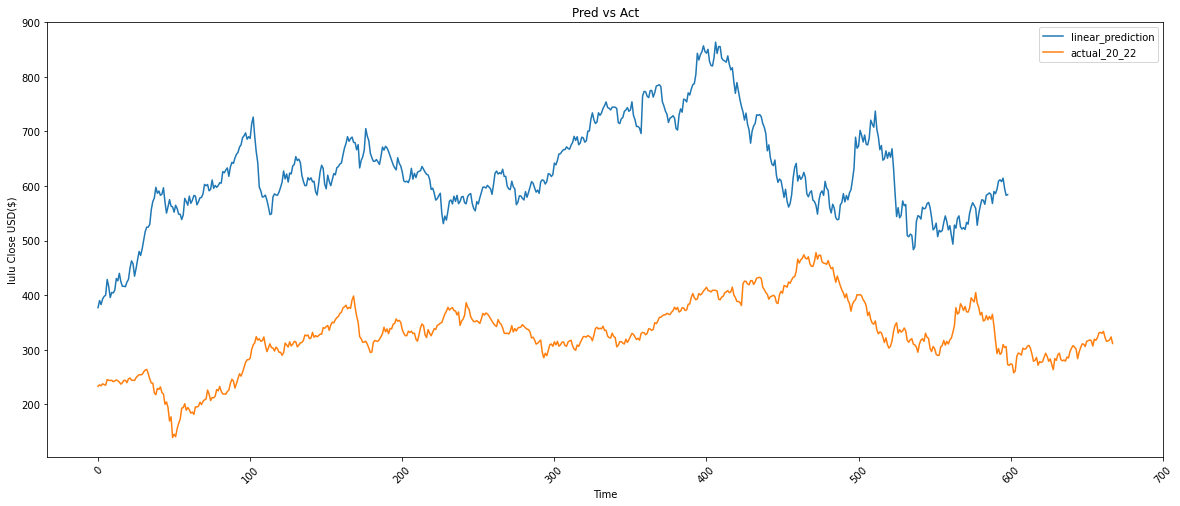

In [32]:
# Visualize the data

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.plot(linear_prediction) # lable='Prediction' , lw=2, alpha=.7)
plt.plot(actual_20_22) #  , lable='Actual') # , lw=2, alpha=.7)
plt.title('Pred vs Act')
plt.xlabel('Time')
plt.ylabel('lulu Close USD($)')
plt.legend(['linear_prediction', 'actual_20_22'])
plt.xticks(rotation=45)
plt.show()